# Multilayer convolutional model

Define, train, and evaluate the following architecture on the MNIST dataset, and on the CIFAR10 dataset:


*   Explicit input layer
*   Convolution (2D) with 32 3×3 filters
*   ReLU
*   Max pooling (2D) with one 2×2 filter
*   Flattening
*   Fully-connected mapping to 128 dimensions
*   ReLU
*   Fully-connected mapping to the final problem size



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
print(keras.__version__)

import matplotlib.pyplot as plt


2.4.0


# Data loading MNIST

In [ ]:
# Predefined dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Input (images)

In [ ]:
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'test examples')

60000 training examples
10000 test examples


In [ ]:
# Data shape
x_train.shape

(60000, 28, 28)

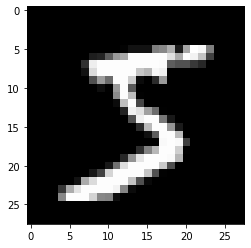

In [ ]:
# Visualizing an instance of the dataset
plt.imshow(x_train[0], cmap='gray')

In [ ]:
# Adding channel dimension
# Reduce channel use np.squeeze 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Converting the data type
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# Converting to categorical form
num_classes = 10
yc_train = keras.utils.to_categorical(y_train, num_classes)
yc_test = keras.utils.to_categorical(y_test, num_classes)

# Multilayer convolutional model

In [ ]:
model = keras.Sequential()

# Convolution (2D) with 32 3×3 filters
model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
# ReLU
model.add(Activation('relu'))
# Max pooling (2D) with one 2×2 filter
model.add(MaxPooling2D((2,2), strides=2))
# Flattening
model.add(Flatten())
# Fully-connected mapping to 128 dimensions
model.add(Dense(128))
# ReLU
model.add(Activation('relu'))
# Fully-connected mapping to the final problem size
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# Model loss and optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.05),
              metrics=['accuracy'])

*   **loss= categorical_crossentropy**  
Computes the categorical crossentropy loss. Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.
*   **optimizer= Adadelta**  
Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:  
 * The continual decay of learning rates throughout training  
 * The need for a manually selected global learning rate       

 Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, initial learning rate can be set, as in most other Keras optimizers.
*  **metrics= accuracy**  
Calculates how often predictions equal labels.

 This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy: an idempotent operation that simply divides total by count.


In [ ]:
# Model training
history= model.fit(x_train, yc_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, yc_test));

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3626 - accuracy: 0.6660 - val_loss: 0.3495 - val_accuracy: 0.9031
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.9065 - val_loss: 0.2694 - val_accuracy: 0.9246
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2684 - accuracy: 0.9242 - val_loss: 0.2353 - val_accuracy: 0.9339
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2411 - accuracy: 0.9308 - val_loss: 0.2151 - val_accuracy: 0.9405
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2118 - accuracy: 0.9397 - val_loss: 0.1897 - val_accuracy: 0.9449
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1916 - accuracy: 0.9453 - val_loss: 0.1679 - val_accuracy: 0.9513
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - accuracy: 0.9512 - val_loss: 0.1552 - val_accuracy: 0.9557
Epoch 

In [ ]:
# Evaluation
score = model.evaluate(x_test, yc_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.121138796210289
Test accuracy: 0.9664000272750854


for the visualization of the accuracy and the loss I have followed this guide:  
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

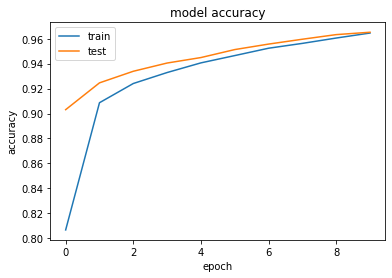

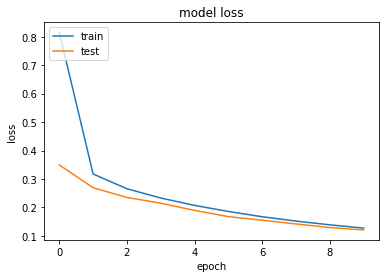

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Inference
yc_pred = model.predict(x_test)

In [ ]:
# Selection of the highest-probability class for each test sample
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix:
[[ 969    0    1    1    0    2    3    2    2    0]
 [   0 1118    3    1    0    1    4    1    7    0]
 [   8    2  978   12    4    0    4   10   13    1]
 [   0    0    3  979    1    8    0    6

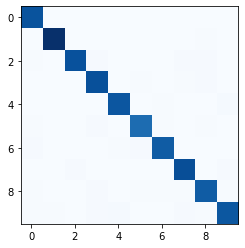

In [ ]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

The result is very good, the accuracy is 0.97. The model commits the biggest error in the classification of 4 where it is often confused with the number 9, however it is a satisfactory result given the low number of times it has been confused.

# Data loading CIFAR10
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
# Predefined dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


# Input (images)

In [ ]:
print(x_train.shape[0], 'training examples')
print(x_test.shape[0], 'test examples')

50000 training examples
10000 test examples


In [ ]:
# Data shape
x_train.shape

(50000, 32, 32, 3)

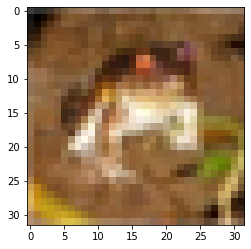

In [ ]:
# Visualizing an instance of the dataset
plt.imshow(x_train[0], cmap='gray')

In [ ]:
# Converting the data type
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
# Converting to categorical form
num_classes = 10
yc_train = keras.utils.to_categorical(y_train, num_classes)
yc_test = keras.utils.to_categorical(y_test, num_classes)

# Multilayer convolutional model

In [ ]:
model = keras.Sequential()

# Convolution (2D) with 32 3×3 filters
model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
# ReLU
model.add(Activation('relu'))
# Max pooling (2D) with one 2×2 filter
model.add(MaxPooling2D((2,2), strides=2))
# Flattening
model.add(Flatten())
# Fully-connected mapping to 128 dimensions
model.add(Dense(128))
# ReLU
model.add(Activation('relu'))
# Fully-connected mapping to the final problem size
model.add(Dense(num_classes))
model.add(Activation('softmax'))



# Model loss and optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.05),
              metrics=['accuracy'])

In [ ]:
# Model training
history= model.fit(x_train, yc_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, yc_test));

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1087 - val_loss: 2.3022 - val_accuracy: 0.1162
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 2.3022 - accuracy: 0.1078 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 2.3021 - accuracy: 0.1151 - val_loss: 2.3019 - val_accuracy: 0.1516
Epoch 4/10
391/391 [==============================] - 2s 4ms/step - loss: 2.3019 - accuracy: 0.1360 - val_loss: 2.3016 - val_accuracy: 0.1707
Epoch 5/10
391/391 [==============================] - 2s 4ms/step - loss: 2.3016 - accuracy: 0.1436 - val_loss: 2.3013 - val_accuracy: 0.1477
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 2.3012 - accuracy: 0.1526 - val_loss: 2.3009 - val_accuracy: 0.1912
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 2.3008 - accuracy: 0.1658 - val_loss: 2.3003 - val_accuracy: 0.2159
Epoch 

In [ ]:
# Evaluation
score = model.evaluate(x_test, yc_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.297126531600952
Test accuracy: 0.21140000224113464


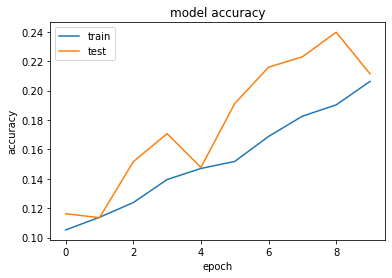

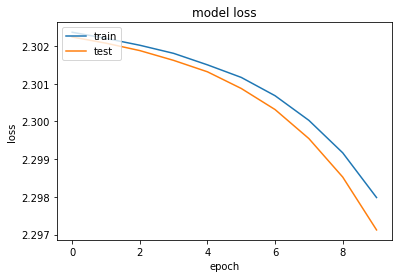

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Inference
yc_pred = model.predict(x_test)

In [ ]:
# Selection of the highest-probability class for each test sample
y_pred = np.argmax(yc_pred, axis=1)

Classification report:
              precision    recall  f1-score   support

           0       0.31      0.46      0.37      1000
           1       0.40      0.01      0.02      1000
           2       0.00      0.00      0.00      1000
           3       0.12      0.58      0.20      1000
           4       0.00      0.00      0.00      1000
           5       0.33      0.04      0.07      1000
           6       0.23      0.35      0.27      1000
           7       0.00      0.00      0.00      1000
           8       0.44      0.19      0.26      1000
           9       0.28      0.48      0.35      1000

    accuracy                           0.21     10000
   macro avg       0.21      0.21      0.16     10000
weighted avg       0.21      0.21      0.16     10000

Confusion matrix:
[[463   0   0 285   0   1  44   0  78 129]
 [101  10   0 409   0   7 186   0  53 234]
 [190   1   0 522   0   7 198   0  10  72]
 [111   0   0 576   0  26 185   0   4  98]
 [ 59   0   0 595   0   9 25

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


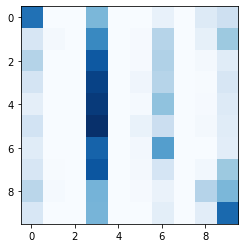

In [ ]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)

The result is not at all satisfactory, practically all the images are classified in the third category. This result could be due to the small number of images in the CIFAR10 dataset.